In [14]:
# Import necessary Python libraries
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import numpy as np
import os
from statistics import stdev

# To do

Add more features to dataframe
- Including total number of frames -> roughly indicates the time (speed) of the btb
    - Requires counting each frame in a magnesis btb sample video
        - Return a list of counts
-  Edit create_samples to deal with new features

Create a new function (or edit find_load_lengths) that creates magnesis btb data if and only if it doesn't already exist in df_clean.csv:
- Import df_clean csv file
- Drop the Unamed : 0 column
- Check if sample_name is in df_clean["sample_name"]
    - If not, process the footage
    - else, proceed to next sample_name

Maybe try dataframes of different video resolution/dimension
- Check to see if data and correlation's remain unchanged based upon the quality of the footage
    - Canm possibly lead to the improvement of runtime

In [15]:
# Raw dataframe initialisation
df_raw = pd.DataFrame(columns = ["sample_name",
                                 "length_of_each_load",
                                 "number_of_loads",
                                 "sum_of_length_of_each_load",
                                 "mean_load_length",
                                 "load_length_deviation",
                                 "shrine_state", 
                                 "length_of_shrine_load_unload"])

In [16]:
# Loop through each file in the Footage folder, get its name + extension and append to an array
def get_sample_names_and_shrine_states():
    """
    This funbction returns the file names of each magnesis btb sample, and the state of the shrine

    :returns: Tuple including file_names, shrine_states
    """

    file_names = []
    shrine_states = []
    for file_name in os.listdir("Footage/Trimmed/"):
        if file_name.endswith(".mp4"): 
            file_names.append(file_name)
            if (file_name.split("_")[2] == "unloaded.mp4"):
                shrine_states.append(1)
            elif (file_name.split("_")[2] == "loaded.mp4"):
                shrine_states.append(0)
            else:
                print("incorrect file name: " + file_name)
    return (file_names, shrine_states)

# Loop through every magnesis btb sample
# Read the footage and append each frame
# Count the number of load frames for each load
# This will take a very long time to load
def find_load_lengths(sample_names, dim):
    """
    This function finds the number of frames of world loads in each continuous world load

    :returns: Lengths of each load
    """
    load_lengths = []
    for sample_name in sample_names:
        capture = cv2.VideoCapture("Footage/Trimmed/" + sample_name)
        capture.set(3, dim[0])
        capture.set(4, dim[1])
        success, img = capture.read()
        print(success)
        f_num = 0
        frames = []
        total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
        sample_rate = total_frames
    
        # Loop through every frame in the sample and append it to the "frames" array, check similarity of previous frame
        sum_load = 0
        loads = []
        for f_num in range(0, total_frames, 1):
            print(sample_name, str(f_num), str(round(f_num/total_frames * 100, 1)) + "%")
            capture.set(cv2.CAP_PROP_POS_FRAMES, f_num)
            _, image = capture.read()
            resize = cv2.resize(image, (dim[0], dim[1]))
            frames.append(resize)
            
            if (f_num != 0):
                #print("ssim of " + str(f_num) + " " + str(f_num - 1) + " is: " + str(ssim(frames[f_num-1], frames[f_num], multichannel = True)))
                if (ssim(frames[f_num], frames[f_num-1], multichannel = True) >= 0.95):
                    sum_load += 1
                elif (sum_load != 0):
                    loads.append(sum_load + 1)
                    sum_load = 0
                else:
                    sum_load = 0
        load_lengths.append(loads)
    return load_lengths                

def create_samples(df, names, lengths, states):
    """
    This functions creates magnesis btb samples, appending them to an array

    :returns: Dataframe including each magnesis btb sample
    """

    series = []
    for i in range(len(names)):
        series.append([names[i], lengths[i], len(lengths[i]), sum(lengths[i]), sum(lengths[i])/len(lengths[i]),
                            stdev(lengths[i]), states[i], lengths[i][-1]])
        #print(series)
    df = pd.DataFrame(series, columns = df.columns)
    return df

Create Dataframe for analysis

In [17]:
dimension = [640, 480]
btb_sample_names, magnesis_shrine_states = get_sample_names_and_shrine_states()
world_load_lengths = find_load_lengths(btb_sample_names, dimension)
df_clean = create_samples(df_raw, btb_sample_names, world_load_lengths, magnesis_shrine_states)
df_clean.to_csv("df_clean.csv")

True
magnesis_btb0_loaded.mp4 0 0.0%
magnesis_btb0_loaded.mp4 1 0.2%
ssim of 1 0 is: 0.6700358813295525
magnesis_btb0_loaded.mp4 2 0.4%
ssim of 2 1 is: 0.6804805621855445
magnesis_btb0_loaded.mp4 3 0.6%
ssim of 3 2 is: 0.6867484616361544
magnesis_btb0_loaded.mp4 4 0.7%
ssim of 4 3 is: 0.69229079369849
magnesis_btb0_loaded.mp4 5 0.9%
ssim of 5 4 is: 0.6921875610038937
magnesis_btb0_loaded.mp4 6 1.1%
ssim of 6 5 is: 0.6892834768724828
magnesis_btb0_loaded.mp4 7 1.3%
ssim of 7 6 is: 0.8125288200448061
magnesis_btb0_loaded.mp4 8 1.5%
ssim of 8 7 is: 0.6503178933770561
magnesis_btb0_loaded.mp4 9 1.7%
ssim of 9 8 is: 0.6412502240768173
magnesis_btb0_loaded.mp4 10 1.9%
ssim of 10 9 is: 0.6401972385246048
magnesis_btb0_loaded.mp4 11 2.1%
ssim of 11 10 is: 0.5985328638914648
magnesis_btb0_loaded.mp4 12 2.2%
ssim of 12 11 is: 0.5120894029972376
magnesis_btb0_loaded.mp4 13 2.4%
ssim of 13 12 is: 0.4649411936745586
magnesis_btb0_loaded.mp4 14 2.6%
ssim of 14 13 is: 0.48580433742285095
magnesis_btb

KeyboardInterrupt: 

In [ ]:
df_clean

,sample_name,length_of_each_load,number_of_loads,sum_of_length_of_each_load,mean_load_length,load_length_deviation,shrine_state,length_of_shrine_load_unload
0,magnesis_btb0_loaded.mp4,"[71, 5, 89, 37, 29, 6, 2]",7,239,34.142857,34.343503,0,2
1,magnesis_btb1_loaded.mp4,"[56, 4, 13, 72, 44, 9, 9, 31, 10, 3, 9]",11,260,23.636364,23.682368,0,9
2,magnesis_btb2_loaded.mp4,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 51, 2, 2, 2, 4,...",24,240,10.000000,18.582367,0,9
3,magnesis_btb3_loaded.mp4,"[21, 44, 13, 7, 120, 49, 8, 3, 28, 8, 12, 4, 2...",15,332,22.133333,30.773056,0,11
4,magnesis_btb4_loaded.mp4,"[60, 27, 7, 33, 75, 24, 17, 5, 18, 12, 2, 2, 5...",15,308,20.533333,21.447167,0,16
5,magnesis_btb5_loaded.mp4,"[62, 13, 85, 49, 6, 21, 3, 10, 6, 3, 8]",11,266,24.181818,28.109849,0,8
6,magnesis_btb6_unloaded.mp4,"[31, 14, 6, 21, 28, 69, 42, 5, 7, 12, 13, 4, 4...",16,270,16.875000,18.073461,1,9


In [ ]:
corr = df_clean.corr()
corr.style.background_gradient(cmap="coolwarm")

,number_of_loads,sum_of_length_of_each_load,mean_load_length,load_length_deviation,shrine_state,length_of_shrine_load_unload
number_of_loads,1.000000,0.049769,-0.958491,-0.729162,0.152572,0.456405
sum_of_length_of_each_load,0.049769,1.000000,-0.052315,0.097657,-0.045539,0.707042
mean_load_length,-0.958491,-0.052315,1.000000,0.856330,-0.285060,-0.528415
load_length_deviation,-0.729162,0.097657,0.856330,1.000000,-0.489387,-0.527721
shrine_state,0.152572,-0.045539,-0.285060,-0.489387,1.000000,-0.015215
length_of_shrine_load_unload,0.456405,0.707042,-0.528415,-0.527721,-0.015215,1.000000


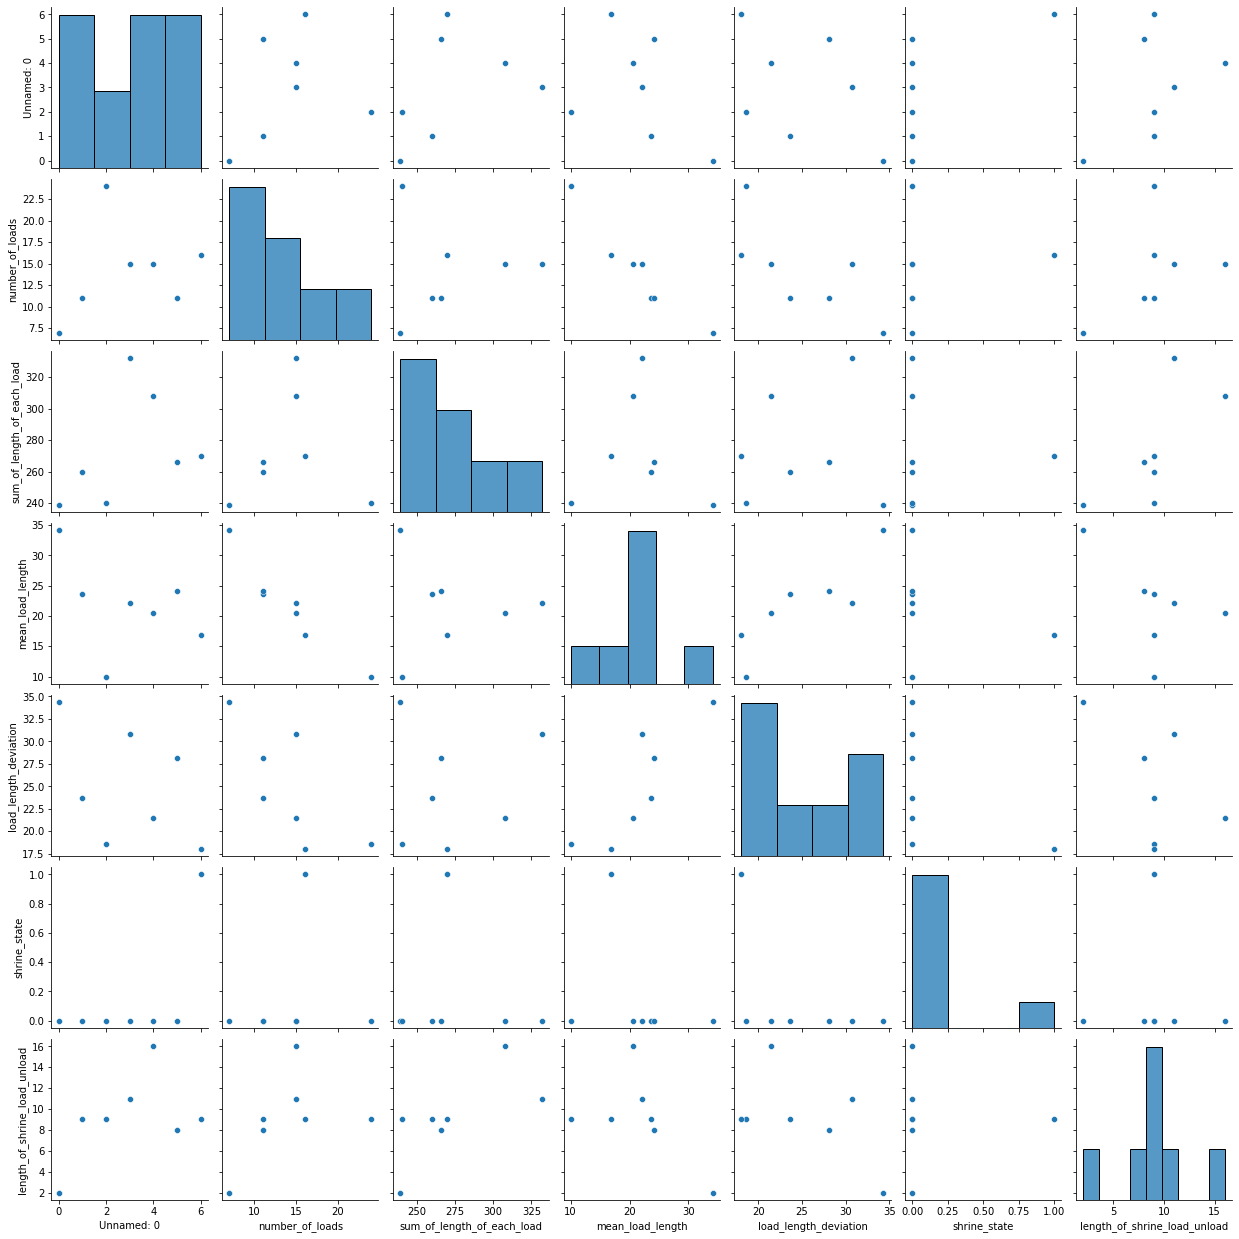

In [ ]:
import pandas as pd
import seaborn as sns

df_testing = pd.read_csv("df_clean.csv")

sns.pairplot(df_testing)

In [ ]:
def convert_frames_to_seconds(df, frame_rate):
    """
    This function converts the frame data of a dataframe into seconds
    
    :returns: Dataframe with time data
    """

    pass